In [2]:
import findspark

In [4]:
findspark.init()

import pyspark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_blobs
from pyspark.sql.types import *
from pyspark.sql import SparkSession
from pyspark.ml.feature import StandardScaler
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SQLContext as sqlContext
from pyspark.ml.clustering import KMeans 
from pyspark.ml.evaluation import ClusteringEvaluator

In [43]:
spark = SparkSession.builder.appName('ttss3').getOrCreate()
data=spark.read.csv('/Users/tuanphattrantruong/Documents/blurred-hcmut-data/mssv_dtk_dc_drop_row_all_na.csv', header=True, inferSchema=True)

In [44]:
df=pd.read_csv('/Users/tuanphattrantruong/Documents/blurred-hcmut-data/mssv_dtk_dc_drop_row_all_na.csv')

In [45]:
df.columns

Index(['MASV1', 'LA1003', 'MI1003', 'PE1003', 'CH1003', 'MT1003', 'PH1003',
       'LA1005', 'PE1005', 'MT1005', 'MT1007', 'LA1007', 'MT1009', 'LA1009',
       'MT2001', 'PE1007', 'SP1007', 'SP1003', 'SP1005', 'SP1009'],
      dtype='object')

In [211]:
df2=df[['MASV1','SP1003','SP1005','SP1009']]

In [212]:
df2 = df2.set_index('MASV1')

In [213]:
df2

,SP1003,SP1005,SP1009
MASV1,,,
10438.0,9.0,7.5,7.5
15731.0,8.0,NaN,NaN
16564.0,7.0,5.5,7.5
19461.0,5.0,7.0,NaN
23086.0,NaN,NaN,NaN
26172.0,6.5,NaN,NaN
26306.0,NaN,NaN,NaN
26565.0,NaN,NaN,NaN
33974.0,8.5,NaN,NaN


In [214]:
df2=df2.dropna(axis=0,how='any')

In [215]:
df2

,SP1003,SP1005,SP1009
MASV1,,,
10438.0,9.0,7.5,7.5
16564.0,7.0,5.5,7.5
61504.0,5.0,5.0,5.5
66797.0,9.0,8.0,6.5
77173.0,8.5,7.5,0.0
85543.0,6.5,6.5,6.0
94690.0,7.5,8.0,8.0
116572.0,7.0,8.0,7.0
176906.0,7.5,6.5,6.0


In [216]:
df2.dtypes

SP1003     object
SP1005     object
SP1009    float64
dtype: object

In [217]:
def convert(x):
    try:
        t = float(x)
        return t
    except:
        return 0

In [219]:
df2.SP1005= df2.SP1005.map(convert)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [220]:
df2

,SP1003,SP1005,SP1009
MASV1,,,
10438.0,9.0,7.50,7.5
16564.0,7.0,5.50,7.5
61504.0,5.0,5.00,5.5
66797.0,9.0,8.00,6.5
77173.0,8.5,7.50,0.0
85543.0,6.5,6.50,6.0
94690.0,7.5,8.00,8.0
116572.0,7.0,8.00,7.0
176906.0,7.5,6.50,6.0


In [221]:
df2 = df2[(df2.SP1003 < 10.01) & (df2.SP1005 < 10.01) & (df2.SP1009 < 10.01)]

In [222]:
df2.reset_index(level=0, inplace=True)

In [223]:
df2.dtypes

MASV1     float64
SP1003    float64
SP1005    float64
SP1009    float64
dtype: object

In [224]:
mySchema = StructType([StructField("MASV1", FloatType(), True),StructField("SP1003", FloatType(), True),StructField("SP1005", FloatType(), True),StructField("SP1009", FloatType(), True)])

In [225]:
sdf = spark.createDataFrame(df2,schema=mySchema)

In [226]:
type(sdf)

pyspark.sql.dataframe.DataFrame

In [227]:
sdf.head()

Row(MASV1=10438.0, SP1003=9.0, SP1005=7.5, SP1009=7.5)

In [228]:
vecAssembler = VectorAssembler(inputCols=['SP1003', 'SP1005', 'SP1009'], outputCol="features")

In [229]:
df_kmeans = vecAssembler.transform(sdf).select('MASV1', 'features')

In [230]:
df_kmeans.show()

+--------+--------------------+
|   MASV1|            features|
+--------+--------------------+
| 10438.0|       [9.0,7.5,7.5]|
| 16564.0|       [7.0,5.5,7.5]|
| 61504.0|       [5.0,5.0,5.5]|
| 66797.0|       [9.0,8.0,6.5]|
| 77173.0|       [8.5,7.5,0.0]|
| 85543.0|       [6.5,6.5,6.0]|
| 94690.0|       [7.5,8.0,8.0]|
|116572.0|       [7.0,8.0,7.0]|
|176906.0|       [7.5,6.5,6.0]|
|210763.0|       [7.5,7.0,7.0]|
|216361.0|       [7.5,7.0,6.5]|
|226368.0|       [6.5,8.5,6.5]|
|232598.0|       [9.0,7.0,8.0]|
|243588.0|[6.59999990463256...|
|268646.0|       [8.0,6.5,6.5]|
|318580.0|       [8.5,7.5,7.5]|
|332695.0|       [7.0,6.0,0.0]|
|379062.0|       [8.0,7.5,8.0]|
|401016.0|       [6.5,8.0,5.5]|
|401560.0|       [6.5,7.0,6.5]|
+--------+--------------------+
only showing top 20 rows



In [231]:
cost = np.zeros(20)
for k in range(2,20):
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
    model = kmeans.fit(df_kmeans.sample(False,0.1, seed=42))
    cost[k] = model.computeCost(df_kmeans)

Text(0,0.5,'cost')

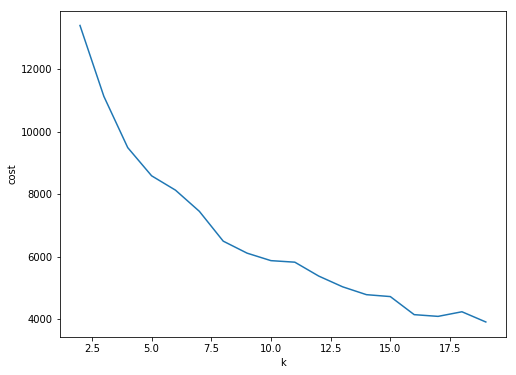

In [232]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,20),cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [269]:
k = 8
kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(df_kmeans)
centers = model.clusterCenters()

print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[7.70487145 7.30236806 6.34492558]
[6.02043189 6.89269103 5.64078073]
[6.77876923 6.72046154 7.41146154]
[5.95744681 1.7287234  4.94680851]
[8.23083004 7.84894598 7.85026351]
[6.8897281  5.53285498 5.74138973]
[6.41411043 6.0797546  1.91717791]
[4.46886792 5.48584906 5.15408805]


In [270]:
transformed = model.transform(df_kmeans).select('MASV1', 'prediction')
rows = transformed.collect()
print(rows)

[Row(MASV1=10438.0, prediction=4), Row(MASV1=16564.0, prediction=2), Row(MASV1=61504.0, prediction=7), Row(MASV1=66797.0, prediction=0), Row(MASV1=77173.0, prediction=6), Row(MASV1=85543.0, prediction=1), Row(MASV1=94690.0, prediction=4), Row(MASV1=116572.0, prediction=0), Row(MASV1=176906.0, prediction=0), Row(MASV1=210763.0, prediction=0), Row(MASV1=216361.0, prediction=0), Row(MASV1=226368.0, prediction=0), Row(MASV1=232598.0, prediction=4), Row(MASV1=243588.0, prediction=1), Row(MASV1=268646.0, prediction=0), Row(MASV1=318580.0, prediction=4), Row(MASV1=332695.0, prediction=6), Row(MASV1=379062.0, prediction=4), Row(MASV1=401016.0, prediction=1), Row(MASV1=401560.0, prediction=1), Row(MASV1=409498.0, prediction=1), Row(MASV1=426508.0, prediction=5), Row(MASV1=439782.0, prediction=4), Row(MASV1=448902.0, prediction=4), Row(MASV1=481259.0, prediction=7), Row(MASV1=485930.0, prediction=1), Row(MASV1=515953.0, prediction=4), Row(MASV1=521186.0, prediction=1), Row(MASV1=540819.0, predic

In [271]:
mySchema1 = StructType([StructField("MASV1", FloatType(), True),StructField("prediction", IntegerType(), True)])

In [272]:
rows1 = spark.createDataFrame(rows,schema=mySchema1)

In [273]:
rows1.show()

+--------+----------+
|   MASV1|prediction|
+--------+----------+
| 10438.0|         4|
| 16564.0|         2|
| 61504.0|         7|
| 66797.0|         0|
| 77173.0|         6|
| 85543.0|         1|
| 94690.0|         4|
|116572.0|         0|
|176906.0|         0|
|210763.0|         0|
|216361.0|         0|
|226368.0|         0|
|232598.0|         4|
|243588.0|         1|
|268646.0|         0|
|318580.0|         4|
|332695.0|         6|
|379062.0|         4|
|401016.0|         1|
|401560.0|         1|
+--------+----------+
only showing top 20 rows



In [274]:
df_pred = rows1.join(sdf, 'MASV1')
df_pred.show()

+-----------+----------+------+------+------+
|      MASV1|prediction|SP1003|SP1005|SP1009|
+-----------+----------+------+------+------+
|1.1768077E7|         7|   5.0|   4.5|   4.0|
|1.9762058E7|         5|   7.0|   5.0|   6.5|
|2.2186548E7|         2|   6.0|   6.5|   8.0|
|2.9614462E7|         5|   6.0|   5.0|   6.0|
|3.5180064E7|         4|   8.5|   8.5|   8.5|
| 3.972326E7|         4|   8.0|   7.5|   8.5|
|4.3935316E7|         5|   6.9|   5.0|   5.0|
|  4.87624E7|         0|   8.5|   7.0|   6.0|
|  5.76837E7|         5|   7.0|   6.0|   5.0|
|6.4113916E7|         2|   5.5|   7.5|   7.5|
|6.6790336E7|         1|   7.0|   7.0|   5.5|
|7.0615016E7|         5|   6.0|   5.0|   6.5|
|7.6705568E7|         2|   7.5|   6.5|   7.0|
|8.2465104E7|         2|   6.0|   7.0|   7.0|
|9.7433544E7|         6|   5.0|   5.5|   2.0|
|9.8528008E7|         0|   9.1|   6.0|   6.9|
|  4206505.0|         4|   9.0|   8.5|   8.5|
|  5060596.0|         0|   7.5|   8.0|   6.5|
|  7323363.0|         4|   7.5|   

In [275]:
pddf_pred = df_pred.toPandas().set_index('MASV1')

In [276]:
pddf_pred

,prediction,SP1003,SP1005,SP1009
MASV1,,,,
11768077.0,7,5.0,4.5,4.0
19762058.0,5,7.0,5.0,6.5
22186548.0,2,6.0,6.5,8.0
29614462.0,5,6.0,5.0,6.0
35180064.0,4,8.5,8.5,8.5
39723260.0,4,8.0,7.5,8.5
43935316.0,5,6.9,5.0,5.0
48762400.0,0,8.5,7.0,6.0
57683700.0,5,7.0,6.0,5.0


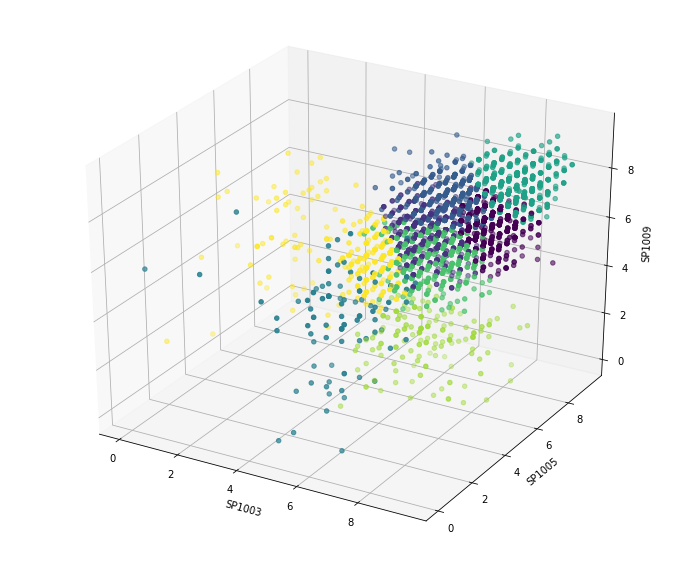

In [282]:
threedee = plt.figure(figsize=(12,10)).gca(projection='3d')
threedee.scatter(pddf_pred.SP1003, pddf_pred.SP1005, pddf_pred.SP1009, c=pddf_pred.prediction)
threedee.set_xlabel('SP1003')
threedee.set_ylabel('SP1005')
threedee.set_zlabel('SP1009')
plt.show()

In [283]:
pddf_pred.index

Float64Index([11768077.0, 19762058.0, 22186548.0, 29614462.0, 35180064.0,
              39723260.0, 43935316.0, 48762400.0, 57683700.0, 64113916.0,
              ...
              67131552.0, 70456640.0, 70623536.0, 71682984.0, 72777992.0,
              76644512.0, 82247560.0, 89559808.0, 91176600.0, 98801408.0],
             dtype='float64', name='MASV1', length=3987)

In [284]:
adf=pd.read_csv('/Users/tuanphattrantruong/Documents/blurred-hcmut-data/student_info.csv')

In [285]:
adf = adf.set_index('MASV1')

In [286]:
result = pd.concat([pddf_pred, adf], axis=1, join='inner')

In [289]:
result.sort_values(by='prediction', ascending=False)

,prediction,SP1003,SP1005,SP1009,F_MAKH,F_TENLOP,F_KHOI,F_MANG,F_TENNGVN
MASV1,,,,,,,,,
11768077,7,5.0,4.5,4.0,UD,KU1403,DHUDCVK14,CVK,Cơ KT- Vật lý KT
7288110,7,2.0,5.5,6.5,HC,HC15HC04,DHHCHTS15,HTS,Hóa-ThựcPhẩm-SinhHọc
13463615,7,5.0,6.0,6.0,UD,KU1401,DHUDCVK14,CVK,Cơ KT- Vật lý KT
28587484,7,5.0,6.0,6.5,XD,XD15XD14,DHXDXDG15,XDG,Xây dựng
3256555,7,5.0,6.0,5.5,CK,CK14CK08,DHCKCKI14,CKI,Cơ khí-Cơ điện tử
24237392,7,6.0,4.0,4.0,DD,DD14LT13,DHDDDDT14,DDT,Điện - Điện tử
4267357,7,2.0,6.0,4.5,GT,GT1201,DHGTGTH12,GTH,Kỹ thuật Giao thông
65079708,7,1.5,5.0,5.0,HC,HC15HC08,DHHCHTS15,HTS,Hóa-ThựcPhẩm-SinhHọc
37152808,7,5.0,4.0,6.0,VL,VL1402,DHVLVL114,VL1,Kỹ Thuật Vật Liệu


In [291]:
result.loc[result['prediction'] == 7]['F_MAKH'].value_counts()

XD    36
CK    16
HC    16
UD    13
GT    10
MO     8
VL     7
MT     6
DD     5
QL     5
DC     4
Name: F_MAKH, dtype: int64

In [293]:
result.loc[result['prediction'] == 6]['F_MAKH'].value_counts()

XD    15
HC    12
CK    12
GT     6
MT     5
MO     4
UD     3
QL     2
DD     1
DC     1
Name: F_MAKH, dtype: int64

In [295]:
result.loc[result['prediction'] == 5]['F_MAKH'].value_counts()

XD    49
HC    41
CK    36
QL    26
DD    24
VL    15
MT    13
UD    12
MO    11
GT     7
DC     1
Name: F_MAKH, dtype: int64

In [298]:
result.loc[result['prediction'] == 4]['F_MAKH'].value_counts()

HC    70
DD    49
CK    35
XD    28
QL    27
MT    21
DC    18
MO    11
UD     9
VL     5
GT     5
Name: F_MAKH, dtype: int64

In [300]:
result.loc[result['prediction'] == 3]['F_MAKH'].value_counts()

XD    6
CK    6
QL    5
MO    4
DD    2
HC    2
MT    2
UD    1
VL    1
DC    1
GT    1
Name: F_MAKH, dtype: int64

In [302]:
result.loc[result['prediction'] == 2]['F_MAKH'].value_counts()

HC    55
CK    39
XD    38
DD    28
MO    24
QL    24
DC    15
UD    11
MT     9
VL     7
GT     4
Name: F_MAKH, dtype: int64

In [304]:
result.loc[result['prediction'] == 1]['F_MAKH'].value_counts()

XD    65
CK    34
HC    33
DD    18
MT    16
MO    16
GT    12
UD    11
QL    11
VL     9
DC     5
Name: F_MAKH, dtype: int64

In [305]:
result.loc[result['prediction'] == 0]['F_MAKH'].value_counts()

HC    68
XD    46
CK    37
DD    35
QL    33
DC    16
MT    11
VL    10
GT    10
MO    10
UD     9
Name: F_MAKH, dtype: int64